Iteração 1/30, Melhor Valor: 1.2475782045291015
Iteração 2/30, Melhor Valor: 0.6868395944150872
Iteração 3/30, Melhor Valor: 0.6868395944150872
Iteração 4/30, Melhor Valor: 0.6868395944150872
Iteração 5/30, Melhor Valor: 0.6868395944150872
Iteração 6/30, Melhor Valor: 0.6868395944150872
Iteração 7/30, Melhor Valor: 0.6868395944150872
Iteração 8/30, Melhor Valor: 0.6868395944150872
Iteração 9/30, Melhor Valor: 0.6868395944150872
Iteração 10/30, Melhor Valor: 0.6868395944150872
Iteração 11/30, Melhor Valor: 0.5425250181569491
Iteração 12/30, Melhor Valor: 0.5084498456792295
Iteração 13/30, Melhor Valor: 0.5051109868602014
Iteração 14/30, Melhor Valor: 0.5047777875425118
Iteração 15/30, Melhor Valor: 0.5047444744763643
Iteração 16/30, Melhor Valor: 0.504741143238407
Iteração 17/30, Melhor Valor: 0.5047408101152986
Iteração 18/30, Melhor Valor: 0.46926242965942977
Iteração 19/30, Melhor Valor: 0.3085745648107726
Iteração 20/30, Melhor Valor: 0.29202766935915625
Iteração 21/30, Melhor Valor

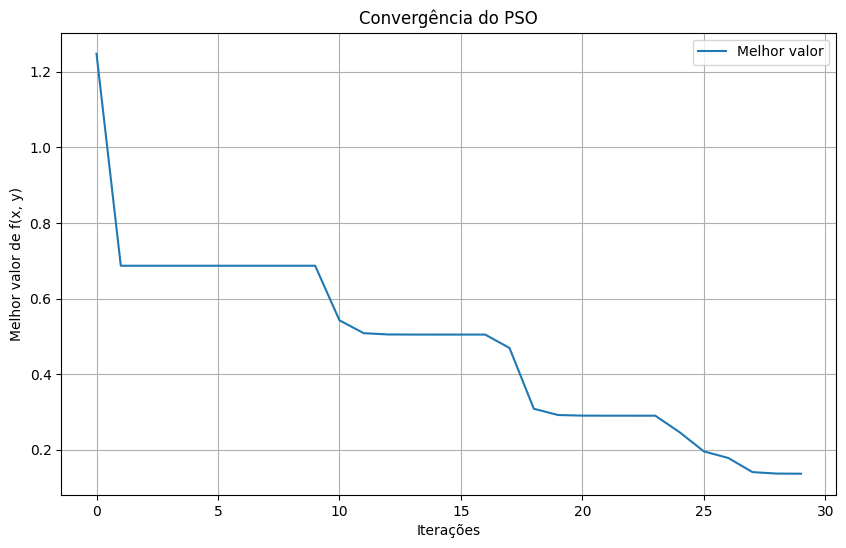

In [120]:
import numpy as np
import matplotlib.pyplot as plt

# Definir a função de Rosenbrock
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

# Inicializar parâmetros do PSO
def initialize_particles(num_particles, dimensions, lower_bound, upper_bound):
    particles = np.random.uniform(lower_bound, upper_bound, (num_particles, dimensions))
    velocities = np.random.uniform(-abs(upper_bound - lower_bound), abs(upper_bound - lower_bound), (num_particles, dimensions))
    return particles, velocities

def update_velocities(velocities, particles, personal_best_positions, global_best_position, w, c1, c2):
    r1 = np.random.rand(particles.shape[0], particles.shape[1])
    r2 = np.random.rand(particles.shape[0], particles.shape[1])
    
    cognitive_component = c1 * r1 * (personal_best_positions - particles)
    social_component = c2 * r2 * (global_best_position - particles)
    
    new_velocities = w * velocities + cognitive_component + social_component
    return new_velocities

def update_positions(particles, velocities, lower_bound, upper_bound):
    new_particles = particles + velocities
    new_particles = np.clip(new_particles, lower_bound, upper_bound)
    return new_particles

def pso(num_particles, dimensions, lower_bound, upper_bound, maxiter):
    # Initialize particles and velocities
    particles, velocities = initialize_particles(num_particles, dimensions, lower_bound, upper_bound)
    
    personal_best_positions = particles.copy()
    personal_best_scores = np.array([rosenbrock(p) for p in particles])
    global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
    
    best_scores = []
    average_scores = []

    w = 0.1  # inertia weight
    c1 = 0.1  # cognitive (particle) weight
    c2 = 0.1  # social (swarm) weight

    for i in range(maxiter):
        for j in range(num_particles):
            score = rosenbrock(particles[j])
            if score < personal_best_scores[j]:
                personal_best_scores[j] = score
                personal_best_positions[j] = particles[j]

        global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
        best_scores.append(np.min(personal_best_scores))
        average_scores.append(np.mean(personal_best_scores))
        velocities = update_velocities(velocities, particles, personal_best_positions, global_best_position, w, c1, c2)
        particles = update_positions(particles, velocities, lower_bound, upper_bound)
        
        print(f"Iteração {i+1}/{maxiter}, Melhor Valor: {best_scores[-1]}")
        
    
        
    return global_best_position, best_scores, average_scores

# Definir parâmetros do PSO
num_particles = 100
dimensions = 2
lower_bound = np.array([-5, -5])
upper_bound = np.array([5, 5])
maxiter = 30

# Executar PSO
best_position, best_scores, average_scores = pso(num_particles, dimensions, lower_bound, upper_bound, maxiter)

print(f"Melhor posição: {best_position}")
print(f"Melhor valor: {best_scores[-1]}")

# Plotar a convergência do melhor valor e do valor médio
plt.figure(figsize=(10, 6))
plt.plot(best_scores, label='Melhor valor')
plt.legend()
plt.xlabel('Iterações')
plt.ylabel('Melhor valor de f(x, y)')
plt.title('Convergência do PSO')
plt.grid(True)
plt.show()


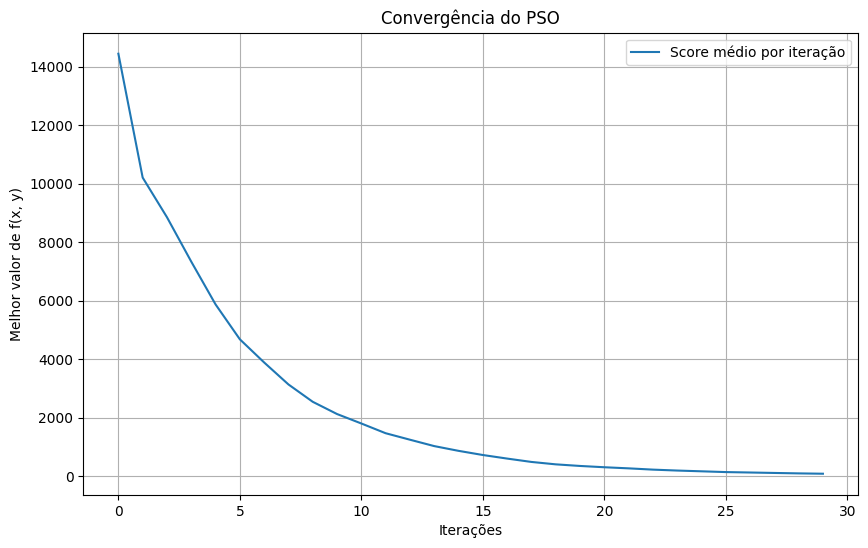

In [121]:
plt.figure(figsize=(10, 6))
plt.plot(average_scores, label='Score médio por iteração')
plt.legend()
plt.xlabel('Iterações')
plt.ylabel('Melhor valor de f(x, y)')
plt.title('Convergência do PSO')
plt.grid(True)
plt.show()

In [122]:
from genetic_algorithm import GeneticAlgorithm
from chromosome_simple_equation_bound5 import ChoromsomeSimpleEquation


inicial_chromosome_list = [ChoromsomeSimpleEquation(
    # random values between -5 and 5
    x = np.random.uniform(-5,5),
    y = np.random.uniform(-5,5)
) for _ in range(100)]
gen = GeneticAlgorithm(inicial_chromosome_list, threshold=-5, max_generations=30, mutation_chance=0.4, crossover_chance=0.5)
result = gen.runToMinimize()

Generation 0 Best 0.38289860809088394 Avg 11528.254252836028
Generation 1 Best 0.38289860809088394 Avg 15299.643313334775
Generation 2 Best 0.38289860809088394 Avg 21711.505380925377
Generation 3 Best 0.38289860809088394 Avg 23867.649368983206
Generation 4 Best 0.38289860809088394 Avg 24489.894283014
Generation 5 Best 0.38289860809088394 Avg 28467.921109293016
Generation 6 Best 0.38289860809088394 Avg 33738.78751772856
Generation 7 Best 0.38289860809088394 Avg 38413.35080105518
Generation 8 Best 0.38289860809088394 Avg 33976.26390690318
Generation 9 Best 0.38289860809088394 Avg 35520.497520850404
Generation 10 Best 0.38289860809088394 Avg 38221.43374722729
Generation 11 Best 0.38289860809088394 Avg 40424.41276517092
Generation 12 Best 0.38289860809088394 Avg 36593.9981173423
Generation 13 Best 0.38289860809088394 Avg 37947.48393595553
Generation 14 Best 0.38289860809088394 Avg 37319.774467256306
Generation 15 Best 0.38289860809088394 Avg 43217.60333972476
Generation 16 Best 0.382898608

In [123]:
# PLOT IT
result[0].x, result[0].y


(1.275989316690346, 1.6835318118060734)

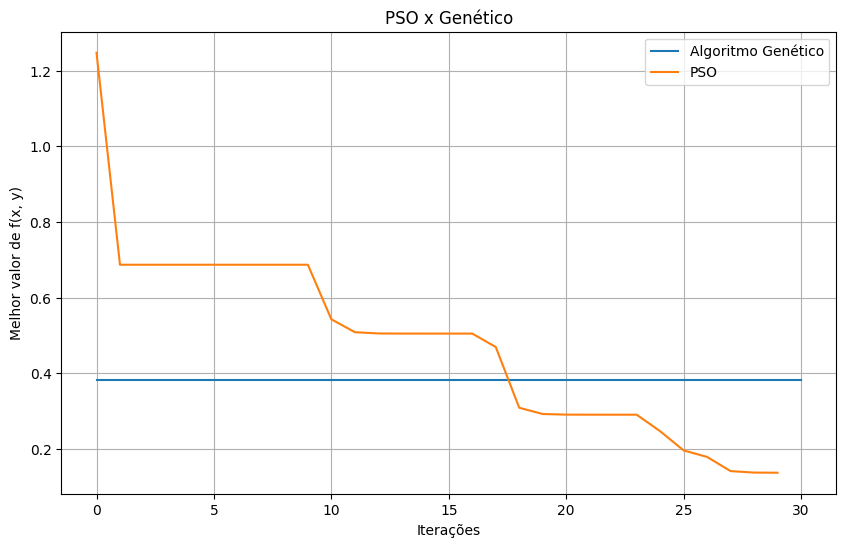

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(result[1], label='Algoritmo Genético')
plt.plot(best_scores, label='PSO')
plt.legend()
plt.xlabel('Iterações')
plt.ylabel('Melhor valor de f(x, y)')
plt.title('PSO x Genético')
plt.grid(True)
plt.show()